In [1]:
!pip install ultralytics

# Import libraries yang diperlukan
import os
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from ultralytics import YOLO
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set seeds untuk reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

Mounted at /content/drive


In [3]:
# Path ke dataset
path = "/content/drive/MyDrive/pmk_dataset/yolo/air_liur"
train_path = os.path.join(path, "train")
test_path = os.path.join(path, "test")
classes = ['0', '1', '2', '3']

print("🔍 DATASET SUMMARY")
print("=" * 50)
for class_name in classes:
    train_class_path = os.path.join(train_path, class_name)
    test_class_path = os.path.join(test_path, class_name)

    train_count = len([f for f in os.listdir(train_class_path)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]) if os.path.exists(train_class_path) else 0
    test_count = len([f for f in os.listdir(test_class_path)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]) if os.path.exists(test_class_path) else 0

    print(f"Kelas {class_name}: Train={train_count}, Test={test_count}")

🔍 DATASET SUMMARY
Kelas 0: Train=30, Test=2
Kelas 1: Train=30, Test=1
Kelas 2: Train=30, Test=2
Kelas 3: Train=30, Test=1



🖼️  VISUALISASI SAMPLE DATASET


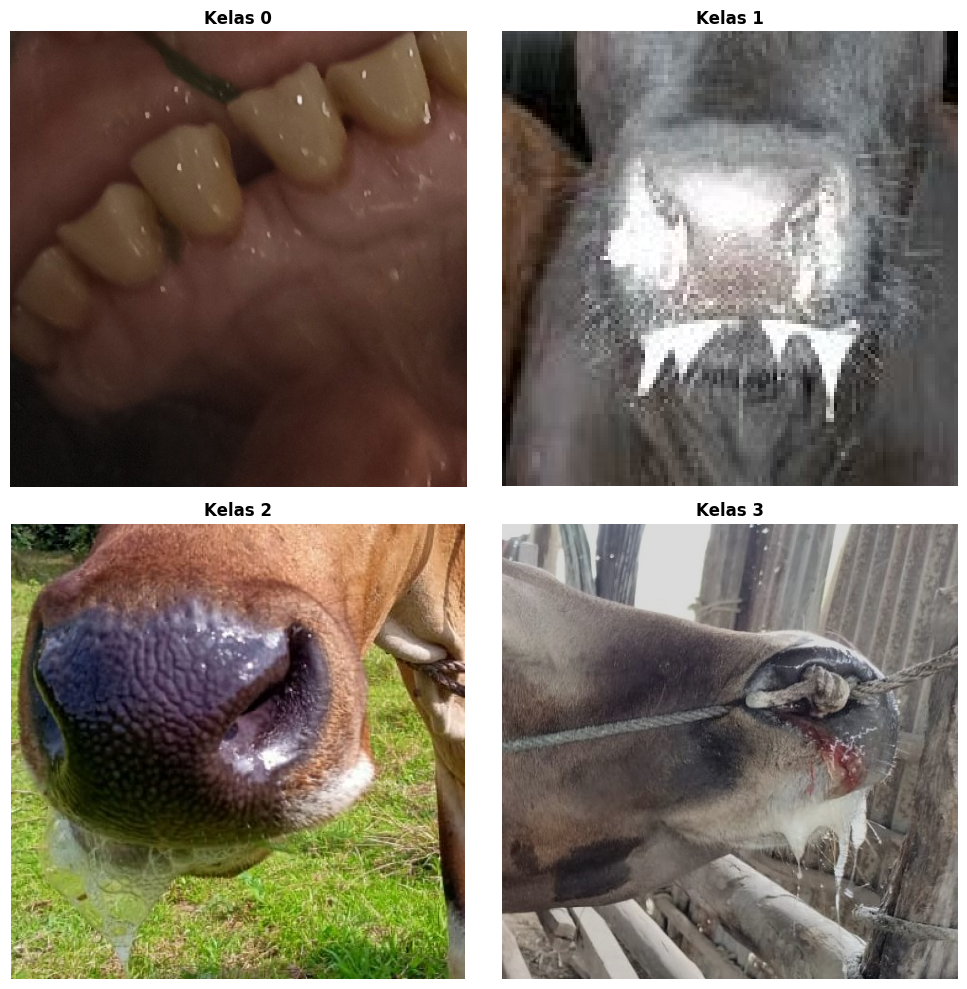

In [4]:
# ================================
# 1. VISUALISASI SAMPLE DATASET
# ================================
print("\n🖼️  VISUALISASI SAMPLE DATASET")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

for idx, class_name in enumerate(classes):
    train_class_path = os.path.join(train_path, class_name)
    if os.path.exists(train_class_path):
        sample_images = [f for f in os.listdir(train_class_path)
                        if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if sample_images:
            sample_img = random.choice(sample_images)
            img_path = os.path.join(train_class_path, sample_img)

            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].set_title(f"Kelas {class_name}", fontsize=12, fontweight='bold')
            axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [5]:
# ================================
# 2. TRAINING MODEL YOLO
# ================================
print("\n🚀 MULAI TRAINING MODEL YOLO")
print("=" * 50)

# Initialize YOLO model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(
    data=path,
    epochs=50,
    imgsz=224,  # Resize ke 224x224
    batch=8,
    device='cpu',
    patience=10,
    save=True,
    project='pmk_classification',
    name='experiment'
)

print("✅ Training selesai!")


🚀 MULAI TRAINING MODEL YOLO


100%|██████████| 5.31M/5.31M [00:00<00:00, 64.2MB/s]


Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/pmk_dataset/yolo/air_liur, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=experiment, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True

train: Scanning /content/drive/.shortcut-targets-by-id/1bJ_7-4_lsycEA_2YE6fuVYTscJSKd_Bl/pmk_dataset/yolo/air_liur/train... 120 images, 0 corrupt: 100%|██████████| 120/120 [01:08<00:00,  1.75it/s]

train: New cache created: /content/drive/.shortcut-targets-by-id/1bJ_7-4_lsycEA_2YE6fuVYTscJSKd_Bl/pmk_dataset/yolo/air_liur/train.cache


val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 0.1±0.1 MB/s, size: 67.3 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1bJ_7-4_lsycEA_2YE6fuVYTscJSKd_Bl/pmk_dataset/yolo/air_liur/test... 6 images, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 15.51it/s]

val: New cache created: /content/drive/.shortcut-targets-by-id/1bJ_7-4_lsycEA_2YE6fuVYTscJSKd_Bl/pmk_dataset/yolo/air_liur/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to pmk_classification/experiment
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size



       1/50         0G       1.37          8        224:   7%|▋         | 1/15 [00:01<00:23,  1.67s/it]

       1/50         0G       1.45          8        224:  13%|█▎        | 2/15 [00:02<00:15,  1.19s/it]
100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50         0G     0.1803          8        224: 100%|██████████| 15/15 [00:06<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all      0.667          1

      Epoch    GPU_mem       loss  Instances       Size



      11/50         0G     0.1275          8        224: 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50         0G      0.133          8        224: 100%|██████████| 15/15 [00:06<00:00,  2.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50         0G     0.1246          8        224: 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all      0.833          1
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 3, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



13 epochs completed in 0.027 hours.
Optimizer stripped from pmk_classification/experiment/weights/last.pt, 3.0MB
Optimizer stripped from pmk_classification/experiment/weights/best.pt, 3.0MB

Validating pmk_classification/experiment/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/drive/.shortcut-targets-by-id/1bJ_7-4_lsycEA_2YE6fuVYTscJSKd_Bl/pmk_dataset/yolo/air_liur/train... found 120 images in 4 classes ✅ 
val: /content/drive/.shortcut-targets-by-id/1bJ_7-4_lsycEA_2YE6fuVYTscJSKd_Bl/pmk_dataset/yolo/air_liur/test... found 6 images in 4 classes ✅ 
test: /content/drive/.shortcut-targets-by-id/1bJ_7-4_lsycEA_2YE6fuVYTscJSKd_Bl/pmk_dataset/yolo/air_liur/test... found 6 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]


                   all      0.833          1
Speed: 0.0ms preprocess, 9.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to pmk_classification/experiment
✅ Training selesai!


In [10]:
# ================================
# 3. EVALUASI PADA TEST SET
# ================================
print("\n📊 EVALUASI MODEL")
print("=" * 50)

# Load model terbaik
best_model = YOLO(os.path.join(results.save_dir, 'weights', 'best.pt'))

# Prediksi pada test set
def predict_test_set(model, test_path, classes):
    y_true = []
    y_pred = []
    image_paths = []

    for class_idx, class_name in enumerate(classes):
        test_class_path = os.path.join(test_path, class_name)

        if os.path.exists(test_class_path):
            test_images = [f for f in os.listdir(test_class_path)
                          if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            for img_name in test_images:
                img_path = os.path.join(test_class_path, img_name)

                # Prediksi
                results = model(img_path, imgsz=224, verbose=False)
                pred_class = results[0].probs.top1

                y_true.append(class_idx)
                y_pred.append(pred_class)
                image_paths.append(img_path)

    return y_true, y_pred, image_paths

print("Melakukan prediksi pada test set...")
y_true, y_pred, image_paths = predict_test_set(best_model, test_path, classes)


📊 EVALUASI MODEL
Melakukan prediksi pada test set...



📈 VISUALISASI HASIL EVALUASI


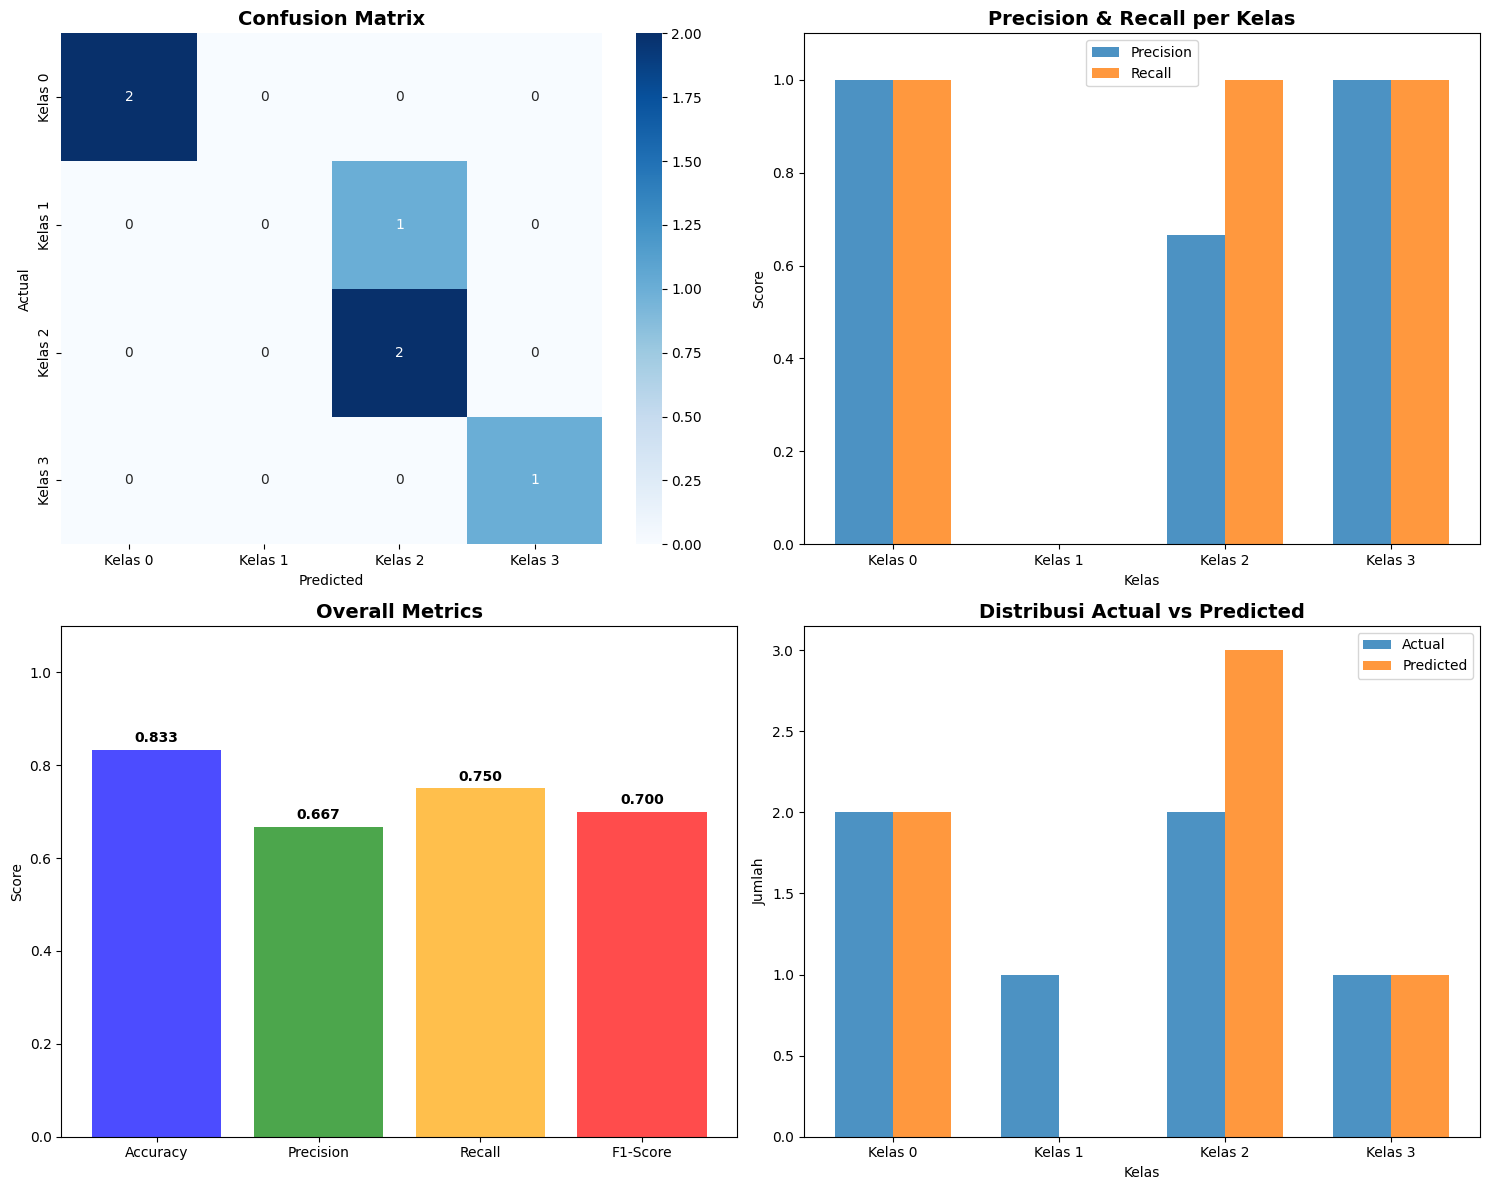

In [12]:
# ================================
# 4. VISUALISASI EVALUASI
# ================================
print("\n📈 VISUALISASI HASIL EVALUASI")
print("=" * 50)

# Setup figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 4.1 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Kelas {i}' for i in classes],
            yticklabels=[f'Kelas {i}' for i in classes],
            ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# 4.2 Akurasi per Kelas
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average=None)

x_pos = np.arange(len(classes))
width = 0.35
axes[0,1].bar(x_pos - width/2, precision, width, label='Precision', alpha=0.8)
axes[0,1].bar(x_pos + width/2, recall, width, label='Recall', alpha=0.8)
axes[0,1].set_xlabel('Kelas')
axes[0,1].set_ylabel('Score')
axes[0,1].set_title('Precision & Recall per Kelas', fontsize=14, fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels([f'Kelas {i}' for i in classes])
axes[0,1].legend()
axes[0,1].set_ylim(0, 1.1)

# 4.3 Overall Metrics
acc = accuracy_score(y_true, y_pred)
overall_precision = np.mean(precision)
overall_recall = np.mean(recall)
overall_f1 = np.mean(f1)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [acc, overall_precision, overall_recall, overall_f1]
colors = ['blue', 'green', 'orange', 'red']

bars = axes[1,0].bar(metrics, scores, color=colors, alpha=0.7)
axes[1,0].set_ylabel('Score')
axes[1,0].set_title('Overall Metrics', fontsize=14, fontweight='bold')
axes[1,0].set_ylim(0, 1.1)

# Tambahkan nilai pada bar
for bar, score in zip(bars, scores):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 4.4 Distribusi Prediksi vs Actual
unique_true, counts_true = np.unique(y_true, return_counts=True)
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)

# Buat array lengkap untuk semua kelas
true_counts = np.zeros(len(classes))
pred_counts = np.zeros(len(classes))

for i, count in zip(unique_true, counts_true):
    true_counts[i] = count
for i, count in zip(unique_pred, counts_pred):
    pred_counts[i] = count

x_pos = np.arange(len(classes))
width = 0.35
axes[1,1].bar(x_pos - width/2, true_counts, width, label='Actual', alpha=0.8)
axes[1,1].bar(x_pos + width/2, pred_counts, width, label='Predicted', alpha=0.8)
axes[1,1].set_xlabel('Kelas')
axes[1,1].set_ylabel('Jumlah')
axes[1,1].set_title('Distribusi Actual vs Predicted', fontsize=14, fontweight='bold')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels([f'Kelas {i}' for i in classes])
axes[1,1].legend()

plt.tight_layout()
plt.show()


📋 CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Kelas 0       1.00      1.00      1.00         2
     Kelas 1       0.00      0.00      0.00         1
     Kelas 2       0.67      1.00      0.80         2
     Kelas 3       1.00      1.00      1.00         1

    accuracy                           0.83         6
   macro avg       0.67      0.75      0.70         6
weighted avg       0.72      0.83      0.77         6


🔍 CONTOH PREDIKSI YANG SALAH


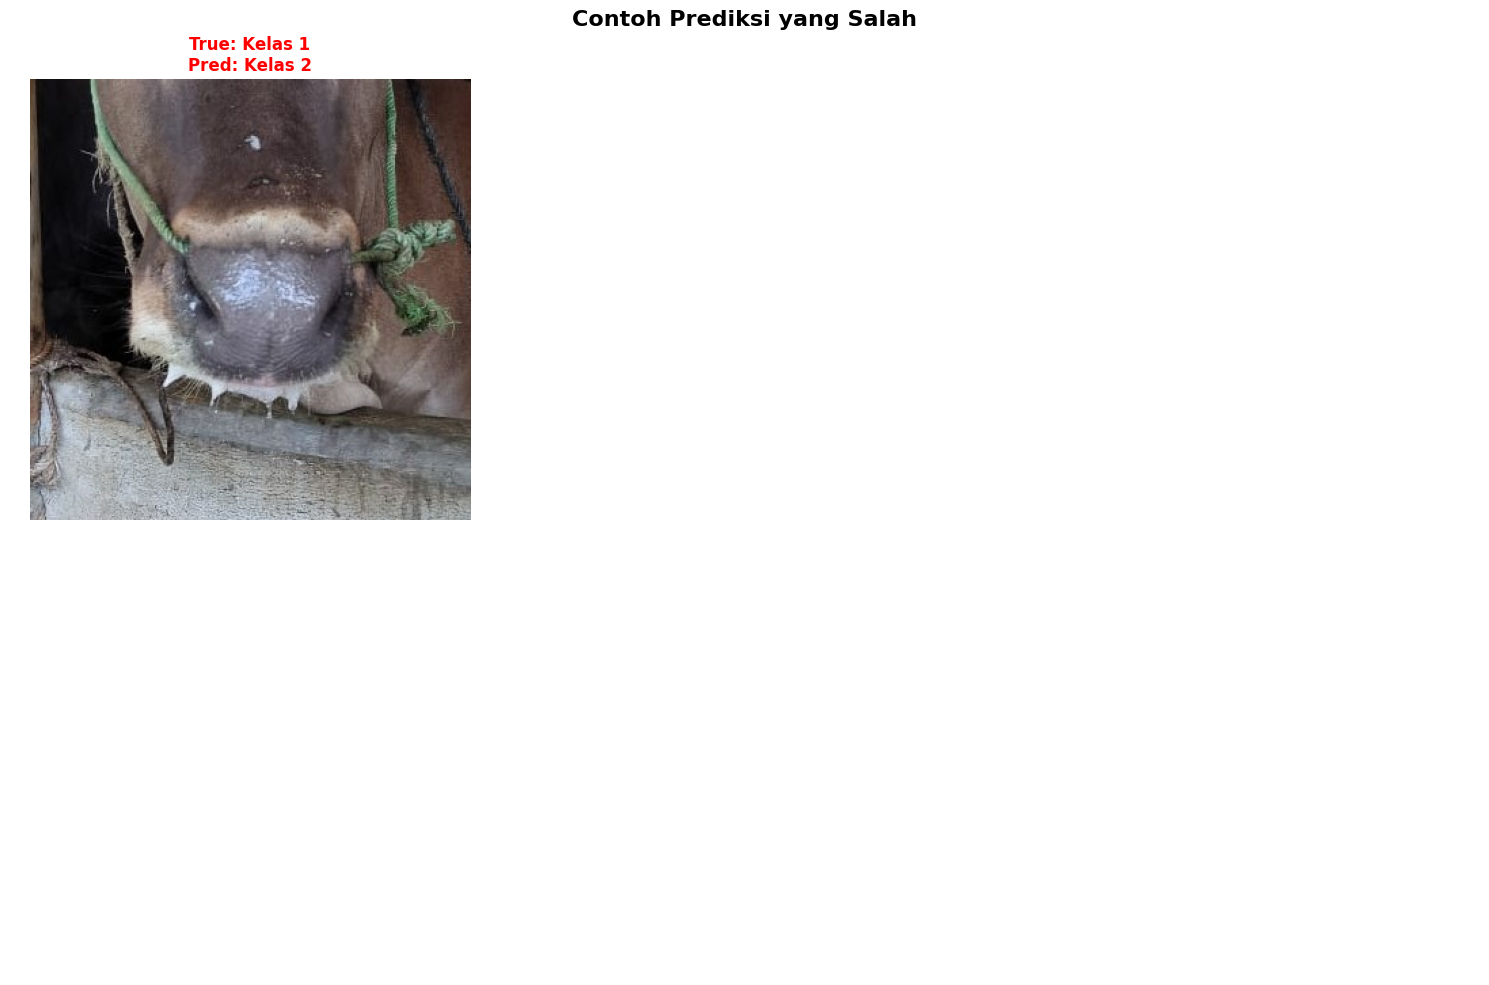

In [13]:
# ================================
# 5. CLASSIFICATION REPORT
# ================================
print("\n📋 CLASSIFICATION REPORT")
print("=" * 50)
print(classification_report(y_true, y_pred, target_names=[f'Kelas {i}' for i in classes]))

# ================================
# 6. CONTOH PREDIKSI SALAH
# ================================
print("\n🔍 CONTOH PREDIKSI YANG SALAH")
print("=" * 50)

# Cari prediksi salah
wrong_preds = []
for i, (true_label, pred_label, img_path) in enumerate(zip(y_true, y_pred, image_paths)):
    if true_label != pred_label:
        wrong_preds.append((true_label, pred_label, img_path))

if wrong_preds:
    # Tampilkan maksimal 6 contoh prediksi salah
    num_examples = min(6, len(wrong_preds))
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    for i in range(num_examples):
        true_label, pred_label, img_path = wrong_preds[i]
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f'True: Kelas {true_label}\nPred: Kelas {pred_label}',
                         color='red', fontweight='bold')
        axes[i].axis('off')

    # Kosongkan axes yang tidak digunakan
    for i in range(num_examples, 6):
        axes[i].axis('off')

    plt.suptitle('Contoh Prediksi yang Salah', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("🎉 Semua prediksi benar!")

In [18]:
# ================================
# 8. EXPORT MODEL KE TFLITE & SIMPAN KE GDRIVE
# ================================
print("\n📱 EXPORT MODEL KE TFLITE & SIMPAN KE GDRIVE")
print("=" * 50)

import shutil

# Buat folder untuk menyimpan models di Google Drive
models_save_path = os.path.join(path, "trained_models")
os.makedirs(models_save_path, exist_ok=True)
print(f"📁 Folder model: {models_save_path}")

try:
    # Export ke TensorFlow Lite
    print("🔄 Exporting ke TFLite...")
    tflite_path = best_model.export(format='tflite', imgsz=224)
    print(f"✅ Model berhasil diexport ke TFLite: {tflite_path}")

    # Export ke ONNX juga (opsional)
    print("🔄 Exporting ke ONNX...")
    onnx_path = best_model.export(format='onnx', imgsz=224)
    print(f"✅ Model berhasil diexport ke ONNX: {onnx_path}")

    # Copy file ke Google Drive
    print("\n📂 Menyimpan ke Google Drive...")

    # 1. Copy best model (.pt)
    best_pt_source = os.path.join(results.save_dir, 'weights', 'best.pt')
    best_pt_dest = os.path.join(models_save_path, 'pmk_best_model.pt')
    shutil.copy2(best_pt_source, best_pt_dest)
    print(f"✅ Best model disimpan: {best_pt_dest}")

    # 2. Copy last model (.pt)
    last_pt_source = os.path.join(results.save_dir, 'weights', 'last.pt')
    last_pt_dest = os.path.join(models_save_path, 'pmk_last_model.pt')
    if os.path.exists(last_pt_source):
        shutil.copy2(last_pt_source, last_pt_dest)
        print(f"✅ Last model disimpan: {last_pt_dest}")

    # 3. Copy TFLite model
    tflite_dest = os.path.join(models_save_path, 'pmk_model.tflite')
    shutil.copy2(tflite_path, tflite_dest)
    print(f"✅ TFLite model disimpan: {tflite_dest}")

    # 4. Copy ONNX model
    onnx_dest = os.path.join(models_save_path, 'pmk_model.onnx')
    shutil.copy2(onnx_path, onnx_dest)
    print(f"✅ ONNX model disimpan: {onnx_dest}")

    # 5. Copy training results (CSV)
    results_csv_source = os.path.join(results.save_dir, 'results.csv')
    results_csv_dest = os.path.join(models_save_path, 'training_results.csv')
    if os.path.exists(results_csv_source):
        shutil.copy2(results_csv_source, results_csv_dest)
        print(f"✅ Training results disimpan: {results_csv_dest}")

    print(f"\n🎉 Semua model berhasil disimpan di Google Drive!")

except Exception as e:
    print(f"❌ Error saat export/copy: {e}")
    print("Melanjutkan tanpa export...")


📱 EXPORT MODEL KE TFLITE & SIMPAN KE GDRIVE
📁 Folder model: /content/drive/MyDrive/pmk_dataset/yolo/air_liur/trained_models
🔄 Exporting ke TFLite...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'pmk_classification/experiment/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 4) (2.8 MB)

TensorFlow SavedModel: starting export with tensorflow 2.18.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.58...
ONNX: export success ✅ 0.4s, saved as 'pmk_classification/experiment/weights/best.onnx' (5.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.28.0...
Saved artifact at 'pmk_classification/experiment/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 224, 224, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 4), dtype=tf.float32,


🔮 SIMULASI PREDIKSI LANGSUNG DI COLAB

🎲 TEST DENGAN SAMPLE GAMBAR DARI DATASET
Sample 1: True=2, Pred=2, Conf=0.8917
Sample 2: True=3, Pred=3, Conf=0.5993
Sample 3: True=0, Pred=0, Conf=1.0000


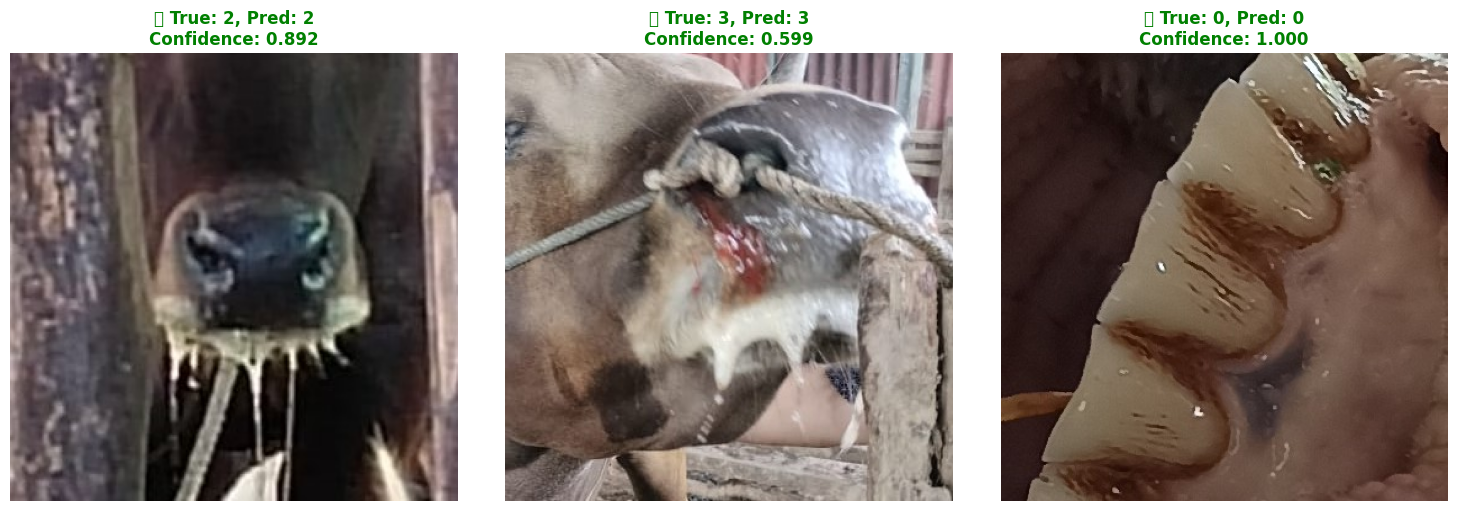

In [15]:
# ================================
# 9. SIMULASI PREDIKSI LANGSUNG
# ================================
print("\n🔮 SIMULASI PREDIKSI LANGSUNG DI COLAB")
print("=" * 50)

from google.colab import files
import io

def predict_uploaded_image(model, classes):
    """Fungsi untuk prediksi gambar yang diupload"""
    print("📤 Upload gambar untuk diprediksi...")
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"\n🔍 Memproses: {filename}")

        # Load gambar
        image_data = uploaded[filename]
        img = Image.open(io.BytesIO(image_data))

        # Prediksi
        results = model(img, imgsz=224, verbose=False)
        pred_class = results[0].probs.top1
        confidence = results[0].probs.top1conf.item()

        # Tampilkan hasil
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title(f'Prediksi: Kelas {pred_class}\nConfidence: {confidence:.4f} ({confidence*100:.2f}%)',
                 fontsize=14, fontweight='bold', color='green')
        plt.axis('off')
        plt.show()

        print(f"🎯 Hasil Prediksi:")
        print(f"   - Kelas: {pred_class}")
        print(f"   - Confidence: {confidence:.4f} ({confidence*100:.2f}%)")

        # Tampilkan semua probabilitas
        print(f"\n📊 Detail Probabilitas:")
        probs = results[0].probs.data
        for i, prob in enumerate(probs):
            print(f"   - Kelas {i}: {prob:.4f} ({prob*100:.2f}%)")

def test_with_existing_images(model, test_path, classes, num_samples=3):
    """Fungsi untuk test dengan gambar yang sudah ada"""
    print("\n🎲 TEST DENGAN SAMPLE GAMBAR DARI DATASET")
    print("=" * 50)

    # Ambil sample random dari test set
    all_test_images = []
    for class_name in classes:
        test_class_path = os.path.join(test_path, class_name)
        if os.path.exists(test_class_path):
            class_images = [os.path.join(test_class_path, f)
                           for f in os.listdir(test_class_path)
                           if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            all_test_images.extend([(img, class_name) for img in class_images])

    # Pilih sample random
    if len(all_test_images) >= num_samples:
        sample_images = random.sample(all_test_images, num_samples)
    else:
        sample_images = all_test_images

    fig, axes = plt.subplots(1, len(sample_images), figsize=(5*len(sample_images), 5))
    if len(sample_images) == 1:
        axes = [axes]

    for i, (img_path, true_class) in enumerate(sample_images):
        # Load dan prediksi
        img = Image.open(img_path)
        results = model(img_path, imgsz=224, verbose=False)
        pred_class = results[0].probs.top1
        confidence = results[0].probs.top1conf.item()

        # Tampilkan
        axes[i].imshow(img)
        color = 'green' if str(pred_class) == true_class else 'red'
        status = '✅' if str(pred_class) == true_class else '❌'

        axes[i].set_title(f'{status} True: {true_class}, Pred: {pred_class}\nConfidence: {confidence:.3f}',
                         fontsize=12, fontweight='bold', color=color)
        axes[i].axis('off')

        print(f"Sample {i+1}: True={true_class}, Pred={pred_class}, Conf={confidence:.4f}")

    plt.tight_layout()
    plt.show()

# Jalankan test dengan sample yang ada
test_with_existing_images(best_model, test_path, classes, num_samples=3)



🎮 INTERACTIVE PREDICTION
Pilih salah satu opsi di bawah:
1. Upload gambar baru untuk diprediksi
2. Test dengan sample lain dari dataset

Masukkan pilihan (1/2): 1
📤 Upload gambar untuk diprediksi...


Saving air_liur_14p.jpeg to air_liur_14p.jpeg

🔍 Memproses: air_liur_14p.jpeg


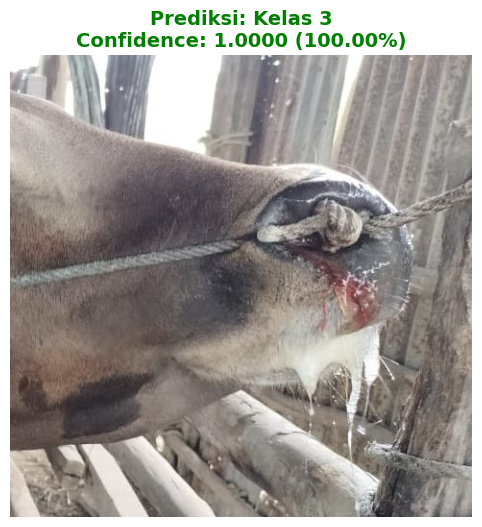

🎯 Hasil Prediksi:
   - Kelas: 3
   - Confidence: 1.0000 (100.00%)

📊 Detail Probabilitas:
   - Kelas 0: 0.0000 (0.00%)
   - Kelas 1: 0.0000 (0.00%)
   - Kelas 2: 0.0000 (0.00%)
   - Kelas 3: 1.0000 (100.00%)


In [19]:
# ================================
# 10. INTERACTIVE PREDICTION
# ================================
print("\n🎮 INTERACTIVE PREDICTION")
print("=" * 50)
print("Pilih salah satu opsi di bawah:")
print("1. Upload gambar baru untuk diprediksi")
print("2. Test dengan sample lain dari dataset")

choice = input("\nMasukkan pilihan (1/2): ").strip()

if choice == "1":
    try:
        predict_uploaded_image(best_model, classes)
    except Exception as e:
        print(f"Error: {e}")
        print("Pastikan Anda upload gambar dengan format yang benar (.jpg, .png, .jpeg)")

elif choice == "2":
    num_samples = int(input("Berapa sample yang ingin ditampilkan? (1-6): ") or 3)
    num_samples = min(max(num_samples, 1), 6)
    test_with_existing_images(best_model, test_path, classes, num_samples)

else:
    print("Pilihan tidak valid. Lewati interactive prediction.")